# K-Means Clustering  
  
This chapter introduces a different clustering algorithm - k-means clustering - and its implementation in `SciPy`. K-means clustering overcomes the biggest drawback of hierarchical clustering that was discussed in the last chapter. As dendrograms are specific to hierarchical clustering, this chapter discusses one method to find the number of clusters before running k-means clustering. The chapter concludes with a discussion on the limitations of k-means clustering and discusses considerations while using this algorithm.

## Basics of k-means clustering
  
**Why k-means clustering?**  
- A critical drawback of hierarchical clustering: runtime
- K means runs significantly fater on large datasets
  
**Function Anatomy for K-Means**  
`kmeans(obs, k_or_guess, iter, thresh, check_finite)`  
- `obs=`: standardized observations  
- `k_or_guess=`: number of clusters  
- `iter=`: number of iterations (default: 20)  
- `thresh=`: threshold (default: 1e-05 or 0.00001)
- `check_finite=`: whether to check if observations contain only finite numbers (default: True)
- Returns two objects: cluster centers, distortion
  
**Function Anatomy for Vector Quantization**  
`vq(obs, code_book, check_finite)`
- `obs=`: standardized observations  
- `code_book=`: cluster centers  
- `check_finite=`: whether to check if observations contain only finite numbers (default: True)   
- Returns two objects: a list of cluster labels, distortion

**K-means clustering**  
- Step 1: Generate cluster centers
- Step 2: Generate cluster labels  
  
**Generate cluster centers**  
To perform K-Means clustering in `scipy`, there are two steps involved - generate the cluster centers and then assign the cluster labels. The first step is performed by the `kmeans()` function. There are *five* arguments for this method. The first argument is the list of observations, which have been standardized through the `whiten()` function. The second argument, `k_or_guess=`, is the number of clusters. The next argument is the number of iterations of the algorithm to perform. Its default value is 20. The fourth argument is the threshold or `thresh=`. The idea behind this argument is that the algorithm is terminated if the change in distortion since the last k-means iteration is less than or equal to the threshold. Its default value is 10 raised to the power minus 5, or 0-point-00001. The last argument is `check_finite=` which is a boolean value indicating if a check needs to be performed on the data for the presence of infinite or NaN values. The default value is True, which ensures that data points with NaN or infinite values are not considered for classification, which ensures that the results are accurate and unbiased. *The k-means function returns two arguments, the cluster centers and distortion*. The cluster centers, is also known as the code book. You will notice that k-means runs really quickly as compared to hierarchical clustering as the number of operations is considerably less in k-means clustering. The distortion is calculated as the sum of square of distances between the data points and cluster centers, as demonstrated in this figure.  
  
**Generate cluster labels**  
The next step is to use the `vq()` function to generate cluster labels. It takes *three* arguments. The first argument is the list of observations, which have been standardized through the `whiten()` function. The second argument is the code book, that is the first output of the `kmeans()` function. The third optional argument is `check_finite=`, a boolean value indicating if a check needs to be performed on the data for the presence of infinite or NaN values. By default, its value is set to True. The function returns the cluster labels, also known as the "code book index" and the distortion.  
  
**A note on distortions**  
Let us explore distortions further. `kmeans()` returns a single value of distortions based on the overall data, whereas `vq()` returns a list of distortions, one for each data point. The mean of the list of distortions from the `vq()` function should approximately equal the distortion value of the `kmeans()` function if the same list of observations is passed.

### K-means clustering: first exercise
  
This exercise will familiarize you with the usage of k-means clustering on a dataset. Let us use the Comic Con dataset and check how k-means clustering works on it.
  
**Recall the two steps of k-means clustering:**  
1. Define cluster centers through `kmeans()` function. It has two required arguments: observations and number of clusters.
2. Assign cluster labels through the `vq()` function. It has two required arguments: observations and cluster centers.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# Load data
comic_con = pd.read_csv('../_datasets/comic_con.csv', index_col=0)
print(comic_con.head())

   x_coordinate  y_coordinate
0            17             4
1            20             6
2            35             0
3            14             0
4            37             4


In [23]:
from scipy.cluster.vq import whiten


# Normalizing data
comic_con['x_scaled'] = whiten(comic_con['x_coordinate'])
comic_con['y_scaled'] = whiten(comic_con['y_coordinate'])

# Display
print(comic_con.head())

   x_coordinate  y_coordinate  x_scaled  y_scaled
0            17             4  0.509349  0.090010
1            20             6  0.599234  0.135015
2            35             0  1.048660  0.000000
3            14             0  0.419464  0.000000
4            37             4  1.108583  0.090010


<Axes: xlabel='x_scaled', ylabel='y_scaled'>

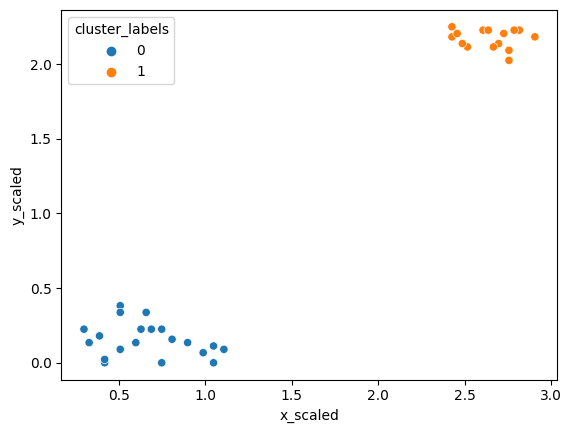

In [24]:
from scipy.cluster.vq import kmeans, vq


# Generate cluster centers
cluster_centers, distortions = kmeans(comic_con[['x_scaled', 'y_scaled']], 2)

# Assign cluster labels
comic_con['cluster_labels'], distortion_list = vq(comic_con[['x_scaled', 'y_scaled']], cluster_centers)

# Plot clusters
sns.scatterplot(x= 'x_scaled', y= 'y_scaled', hue= 'cluster_labels', data= comic_con)

Notice that the clusters formed are exactly the same as hierarchical clustering that you did in the previous chapter.

### Runtime of k-means clustering
  
Recall that it took a significantly long time to run hierarchical clustering. How long does it take to run the `kmeans()` function on the FIFA dataset?

In [25]:
# Load data
fifa = pd.read_csv('../_datasets/fifa_18_dataset.csv')
print(fifa.head())

   sliding_tackle  aggression
0              23          63
1              26          48
2              33          56
3              38          78
4              11          29


In [26]:
# Normalize dataset
fifa['scaled_sliding_tackle'] = whiten(fifa['sliding_tackle'])
fifa['scaled_aggression'] = whiten(fifa['aggression'])
print(fifa.head())

   sliding_tackle  aggression  scaled_sliding_tackle  scaled_aggression
0              23          63               1.070924           3.609257
1              26          48               1.210610           2.749910
2              33          56               1.536544           3.208228
3              38          78               1.769353           4.468604
4              11          29               0.512181           1.661404


In [27]:
from scipy.cluster.hierarchy import linkage

# Comparing runtime
%timeit kmeans(fifa[['scaled_sliding_tackle', 'scaled_aggression']], 2)

260 ms ± 38.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## How many clusters?
  
**How to find the right k?**
- No absolute method to find right number of clusters(k) in k-means clustering
- Elbow method
  
**Distortion revisited**  
  
![Alt text](../_images/kmeans-distortion.png)
  
- Distortion: sum of squared distances of points from cluster centers 
- Decreases with an increasing number of clusters 
- Becomes zero when the number of clusters equals the numbers of points 
- Elbow plot: line plot between cluster centers and distortion

**Elbow method**  
- Elbow plot helps indicate number of clusters present in data
- Only gives an indication of optimal k
- Does not always pinpoint how many k
- Other methods : average silhouette, gap statistic

### Elbow method on distinct clusters
  
Let us use the comic con data set to see how the elbow plot looks on a data set with distinct, well-defined clusters. You may want to display the data points before proceeding with the exercise.

([<matplotlib.axis.XTick at 0x1239dd510>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5')])

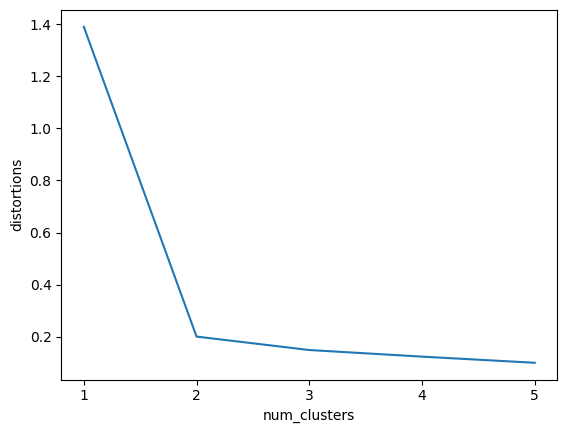

In [28]:
# Creating holding list and nth-cluster range()
distortions = []
num_clusters = range(1,6)

# Creating list of distortions from the kmeans() function
for i in num_clusters:
    cluster_centers, distortion = kmeans(comic_con[['x_scaled', 'y_scaled']], i)
    distortions.append(distortion)

# Creating a dataframe with two list - num_clusters, distortions
elbow_plot = pd.DataFrame({
    'num_clusters': num_clusters,
    'distortions': distortions
})

# Create a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data= elbow_plot)
plt.xticks(num_clusters)

From looking at our elbow graph, it appears that the number of clusters should be 2.

### Elbow method on uniform data
  
In the earlier exercise, you constructed an elbow plot on data with well-defined clusters. Let us now see how the elbow plot looks on a data set with uniformly distributed points. You may want to display the data points on the console before proceeding with the exercise.

In [29]:
# Load data
uniform_data = pd.read_csv('../_datasets/uniform_data.csv', index_col=0)
print(uniform_data.head())

   x_coordinate  y_coordinate
0            39             3
1            42             7
2            58             3
3            43             3
4            13             6


In [30]:
# Normalize data
uniform_data['x_scaled'] = whiten(uniform_data['x_coordinate'])
uniform_data['y_scaled'] = whiten(uniform_data['y_coordinate'])
print(uniform_data.head())

   x_coordinate  y_coordinate  x_scaled  y_scaled
0            39             3  2.376199  1.152237
1            42             7  2.558984  2.688554
2            58             3  3.533835  1.152237
3            43             3  2.619912  1.152237
4            13             6  0.792066  2.304475


([<matplotlib.axis.XTick at 0x1239f7bd0>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5')])

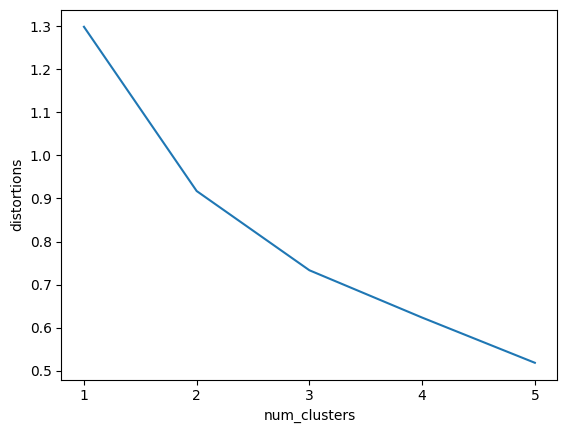

In [31]:
# Creating holding list and nth-cluster range()
distortions = []
num_clusters = range(1,6)

# Creating list of distortions from the kmeans() function
for i in num_clusters:
    cluster_centers, distortion = kmeans(uniform_data[['x_scaled', 'y_scaled']], i)
    distortions.append(distortion)

# Creating a dataframe with two list - num_clusters, distortions
elbow_plot = pd.DataFrame({
    'num_clusters': num_clusters,
    'distortions': distortions
})

# Create a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data= elbow_plot)
plt.xticks(num_clusters)

There is no well defined elbow in this plot. Meaning that it is hard to interprete the number of clusters needed.

## Limitations of k-means clustering
  
**Limitations of k-means clustering**  
- How to find the right K
- Impact of seeds
- Biased towards equal sized clusters
  
**Limitations of k-means clustering**  
Earlier, we saw that k-means clustering overcomes the biggest drawback of hierarchical clustering, runtime. However, it comes with its own set of limitations which you should consider while using it. The first issue is the procedure to find the right number of clusters, k. As discussed earlier, the elbow method is one of the ways to determine the right k, but may not always work. The next limitation of k-means clustering is the impact of seeds on clustering, which we will explore shortly. The final limitation that we will explore is the formation of equal-sized clusters.  

**Impact of seeds**  
Let us look at the impact of seeds on the resulting clusters. As the process of defining the initial cluster centers is random, this initialization can affect the final clusters. Therefore, to get consistent results when running k-means clustering on the same dataset multiple times, it is a good idea to set the initialization parameters for random number generation. The seed is initialized through the seed method of random class in `numpy`. You can pass a single integer or a 1D array as an argument. Let us see the results of k-means clustering when we pass two different seeds before running the algorithm. For the purposes of testing, we take a list of randomly generated 200 points and use five clusters. It is seen that in the two cases the cluster sizes are different.  
  
**Impact of seeds: plots**  
Here are the plots to compare the resulting clusters. You will notice that many points along the cluster boundaries have interchanged clusters. Interestingly, the effect of seeds is only seen when the data to be clustered is fairly uniform. If the data has distinct clusters before clustering is performed, the effect of seeds will not result in any changes in the formation of resulting clusters.  
  
**Uniform clusters in k means**  
To illustrate the bias in `kmeans()` clustering towards uniform clusters to minimize variance, let us perform clustering on this set of 280 points, divided into non uniform groups of 200, 70 and 10. Graphically, they look distinctly separated into three clusters. Therefore, if we ran any clustering algorithm, these three clusters should be picked up. Let us test that theory with `kmeans()` clustering first.  
  
**Uniform clusters in k-means: a comparison**  
If you look at the results of k-means clustering on this dataset, you get non intuitive clusters even after varying the seeds. This is because the very idea of k-means clustering is to minimize distortions. This results in clusters that have similar areas and not necessarily the similar number of data points. However, when you look at the results of hierarchical clustering on the same dataset using the complete method to decide cluster proximity, you will notice that the clusters formed are intuitive and consistent with our assumption in the earlier slide.  
  
**Final thoughts**  
Finally, we realize that each technique has its pros and cons, and you should know about the underlying assumptions of each technique before applying them. Ideally, you should spend some time pondering over your data size, its patterns and resources and time available to you before finalizing on an algorithm.  

### Impact of seeds on distinct clusters
  
You noticed the impact of seeds on a dataset that did not have well-defined groups of clusters. In this exercise, you will explore whether seeds impact the clusters in the Comic Con data, where the clusters are well-defined.

<Axes: xlabel='x_scaled', ylabel='y_scaled'>

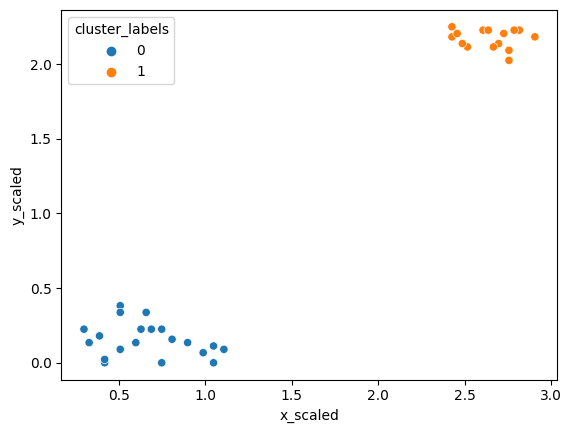

In [32]:
# Initialize seed
np.random.seed(0)

# Run kmeans clustering
cluster_centers, distortion = kmeans(comic_con[['x_scaled', 'y_scaled']], 2)
comic_con['cluster_labels'], distortion_list = vq(comic_con[['x_scaled', 'y_scaled']], cluster_centers)

# Plot the scatterplot
sns.scatterplot(x='x_scaled', y='y_scaled', hue='cluster_labels', data=comic_con)

<Axes: xlabel='x_scaled', ylabel='y_scaled'>

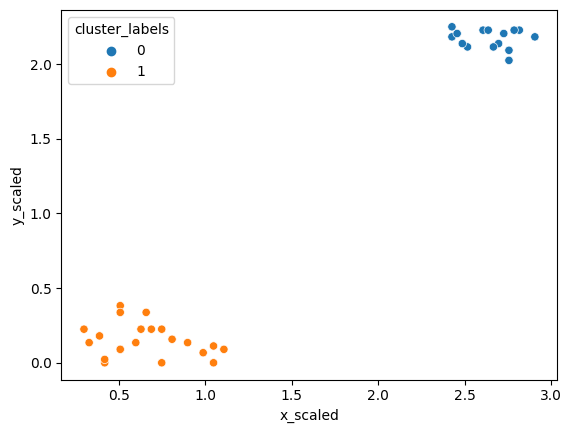

In [33]:
# Initialize a random seed
np.random.seed([1, 2, 1000])

# Run kmeans clustering
cluster_centers, distortion = kmeans(comic_con[['x_scaled', 'y_scaled']], 2)
comic_con['cluster_labels'], distortion_list = vq(comic_con[['x_scaled', 'y_scaled']], cluster_centers)

# Plot the scatterplot
sns.scatterplot(x='x_scaled', y='y_scaled', hue='cluster_labels', data=comic_con)

### Uniform clustering patterns
  
Now that you are familiar with the impact of seeds, let us look at the bias in k-means clustering towards the formation of uniform clusters.
Let us use a mouse-like dataset for our next exercise. A mouse-like dataset is a group of points that resemble the head of a mouse: it has three clusters of points arranged in circles, one each for the face and two ears of a mouse.

In [34]:
mouse = pd.read_csv('../_datasets/mouse.csv', index_col=0)
print(mouse.head())

   x_coordinate  y_coordinate
0     33.875528     44.893421
1     38.208748     41.116327
2     35.740588     57.418006
3     32.546963     57.218082
4     62.063146     47.196944


In [35]:
# Normalize data
mouse['x_scaled'] = whiten(mouse['x_coordinate'])
mouse['y_scaled'] = whiten(mouse['y_coordinate'])
print(mouse.head())

   x_coordinate  y_coordinate  x_scaled  y_scaled
0     33.875528     44.893421  2.209458  2.977524
1     38.208748     41.116327  2.492083  2.727011
2     35.740588     57.418006  2.331103  3.808208
3     32.546963     57.218082  2.122806  3.794948
4     62.063146     47.196944  4.047935  3.130303


<Axes: xlabel='x_scaled', ylabel='y_scaled'>

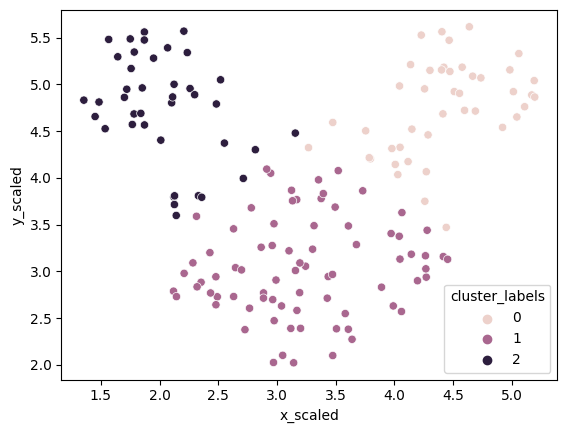

In [36]:
# Generate cluster centers
cluster_centers, distortion = kmeans(mouse[['x_scaled', 'y_scaled']], 3)

# Assign cluster labels
mouse['cluster_labels'], distortion_list = vq(mouse[['x_scaled', 'y_scaled']], cluster_centers)

# Plot clusters
sns.scatterplot(x= 'x_scaled', y= 'y_scaled', hue= 'cluster_labels', data= mouse)

Notice that `kmeans()` is unable to capture the three visible clusters clearly, and the two clusters towards the top have taken in some points along the boundary. This happens due to the underlying assumption in `kmeans()` algorithm to minimize distortions which leads to clusters that are similar in terms of area.

### FIFA 18: defenders revisited
  
In the FIFA 18 dataset, various attributes of players are present. 
   
**Two such attributes are:**  
- defending: a number which signifies the defending attributes of a player
- physical: a number which signifies the physical attributes of a player
  
These are typically defense-minded players. In this exercise, you will perform clustering based on these attributes in the data.

In [37]:
# Load dataset
fifa = pd.read_csv('../_datasets/fifa_18_sample_data.csv')
print(fifa.head())

       ID               name                     full_name  \
0   20801  Cristiano Ronaldo  C. Ronaldo dos Santos Aveiro   
1  158023           L. Messi                  Lionel Messi   
2  190871             Neymar    Neymar da Silva Santos Jr.   
3  176580          L. Suárez                   Luis Suárez   
4  167495           M. Neuer                  Manuel Neuer   

                  club                                club_logo  special  age  \
0       Real Madrid CF  https://cdn.sofifa.org/18/teams/243.png     2228   32   
1         FC Barcelona  https://cdn.sofifa.org/18/teams/241.png     2158   30   
2  Paris Saint-Germain   https://cdn.sofifa.org/18/teams/73.png     2100   25   
3         FC Barcelona  https://cdn.sofifa.org/18/teams/241.png     2291   30   
4     FC Bayern Munich   https://cdn.sofifa.org/18/teams/21.png     1493   31   

                     league  birth_date  height_cm  ...  prefers_cb  \
0  Spanish Primera División  1985-02-05      185.0  ...       False  

In [38]:
# Select the attributes desired for clustering
fifa = fifa[['def', 'phy']].copy()
print(fifa.head())

   def  phy
0   33   80
1   26   61
2   30   60
3   42   81
4   60   91


In [39]:
# Normalize the dataset
fifa['scaled_def'] = whiten(fifa['def'])
fifa['scaled_phy'] = whiten(fifa['phy'])
print(fifa.head())

   def  phy  scaled_def  scaled_phy
0   33   80    1.649258    9.374085
1   26   61    1.299416    7.147740
2   30   60    1.499326    7.030564
3   42   81    2.099056    9.491261
4   60   91    2.998652   10.663022


                scaled_def  scaled_phy
cluster_labels                        
0                 1.948298    7.163234
1                 3.817844    9.020452
2                 2.072803    9.066327


<Axes: xlabel='scaled_def', ylabel='scaled_phy'>

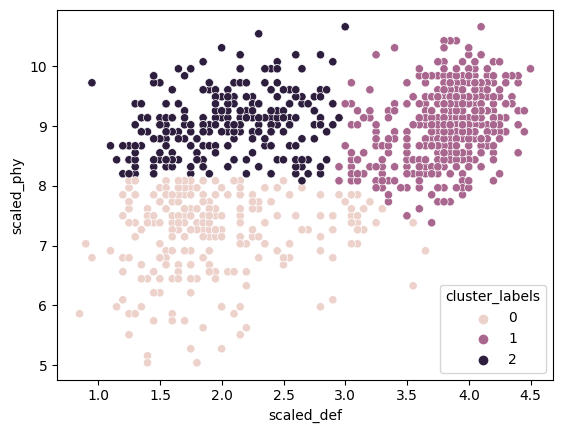

In [40]:
# Setup a random seed in numpy
np.random.seed([1000, 2000])

# Fit the data into a k-means algorithm
cluster_centers, _ = kmeans(fifa[['scaled_def', 'scaled_phy']], 3)

# Assign cluster lables
fifa['cluster_labels'], _ = vq(fifa[['scaled_def', 'scaled_phy']], cluster_centers)

# Display cluster centers
print(fifa[['scaled_def', 'scaled_phy', 'cluster_labels']].groupby('cluster_labels').mean())

# Create a scatter plot with seaborn
sns.scatterplot(x= 'scaled_def', y= 'scaled_phy', hue= 'cluster_labels', data= fifa)